In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append(r"C:\Users\yangshanqi\Documents\lab\labgithubcopy\task_1_version_2")

In [3]:
#from calculation_score import cal_score
from NN_function_with_kFold import nn_predict_with_distance_adjust
from NN_function_with_kFold import nn_predict_with_distance_adjust_presion
from NN_function_with_kFold import nn_validation
from plot_prediction import nn_plot_prediction

In [4]:
X_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_FCNN.csv")
y_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_FCNN.csv")
X_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_CNN.csv")
y_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_CNN.csv")
X_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_kMeans.csv")
y_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_kMeans.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")
X_scaled_kMeans=X_scaled_kMeans.drop("predict_cluster",1)
y_scaled_kMeans=y_scaled_kMeans.drop("predict_cluster",1)
X_val=X_val.drop("Unnamed: 0",1)
y_val=y_val.drop("Unnamed: 0",1)

In [5]:
X_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")

X_scaled_outlier_detection = pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_train_after_detection.csv")
y_scaled_outlier_detection = pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_train_after_detection.csv")
X_scaled_outlier_detection = X_scaled_outlier_detection.drop("Unnamed: 0",1)
X_scaled_outlier_detection = X_scaled_outlier_detection.drop("robust_dis",1)
y_scaled_outlier_detection =y_scaled_outlier_detection.drop("Unnamed: 0",1)
y_scaled_outlier_detection =y_scaled_outlier_detection.drop("Unnamed: 0.1",1)
y_scaled_outlier_detection =y_scaled_outlier_detection.drop("robust_dis",1)

### data amount of different data sets ###

In [6]:
input_data_amount=pd.DataFrame({"raw_only_scaled":[len(X_scaled)],"raw_scaled_kMeans":[len(X_scaled_kMeans)],"raw_scaled_CNN":[len(X_scaled_CNN)],"raw_scaled_FCNN":[len(X_scaled_FCNN)]})

In [7]:
input_data_amount.rows=['amount']

In [8]:
input_data_amount

,raw_only_scaled,raw_scaled_CNN,raw_scaled_FCNN,raw_scaled_kMeans
0,355455,86412,89524,269384


### the data ratio of non-cancer data to cancer data in different data set ###

In [6]:
len(y_scaled[y_scaled['label']==1])/len(y_scaled[y_scaled['label']==2])

5.6180413330850865

In [7]:
len(y_scaled_FCNN[y_scaled_FCNN['label']==1])/len(y_scaled_FCNN[y_scaled_FCNN['label']==2])

1.8300825087724844

In [9]:
len(y_scaled_CNN[y_scaled_CNN['label']==1])/len(y_scaled_CNN[y_scaled_CNN['label']==2])

2.3029584894121244

In [10]:
len(y_scaled_kMeans[y_scaled_kMeans['label']==1])/len(y_scaled_kMeans[y_scaled_kMeans['label']==2])

4.01552783466766

In [12]:
len(y_scaled_outlier_detection [y_scaled_outlier_detection ['label']==1])/len(y_scaled_outlier_detection [y_scaled_outlier_detection ['label']==2])

6.320791020844468

### adjust parameter in large scale ###

In [7]:
NN_scaled_FCNN_result=nn_predict_with_distance_adjust(X_scaled_FCNN,y_scaled_FCNN)
NN_scaled_CNN_result=nn_predict_with_distance_adjust(X_scaled_CNN,y_scaled_CNN)
NN_scaled_kMeans_result=nn_predict_with_distance_adjust(X_scaled_kMeans,y_scaled_kMeans)
NN_scaled_result=nn_predict_with_distance_adjust(X_scaled,y_scaled)
NN_scaled_outlier_detection_result=nn_predict_with_distance_adjust(X_scaled_outlier_detection,y_scaled_outlier_detection)

In [16]:
len(y_scaled_CNN[y_scaled_CNN['label']==2])

26162

if (alpha)*dis_1[index]<(1-alpha)*dis_2[index]:
<br>
                y_pred.append(np.float64(1.0))
<br>
        else:
<br>
                y_pred.append(np.float64(2.0))

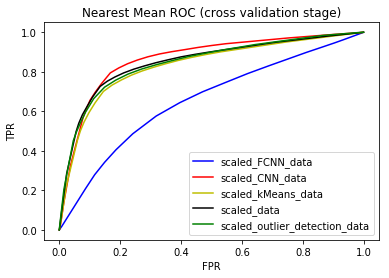

In [15]:
plt.title("Nearest Mean ROC (cross validation stage)")
plt.plot(NN_scaled_FCNN_result[4:]['FPR'],NN_scaled_FCNN_result[4:]['TPR'],"b-",label='scaled_FCNN_data')
plt.plot(NN_scaled_CNN_result[1:]['FPR'],NN_scaled_CNN_result[1:]['TPR'],"r-",label='scaled_CNN_data')
plt.plot(NN_scaled_kMeans_result[1:]['FPR'],NN_scaled_kMeans_result[1:]['TPR'],"y-",label='scaled_kMeans_data')
plt.plot(NN_scaled_result[1:]['FPR'],NN_scaled_result[1:]['TPR'],"k-",label='scaled_data')
plt.plot(NN_scaled_outlier_detection_result[4:]['FPR'],NN_scaled_outlier_detection_result[4:]['TPR'],"g-",label='scaled_outlier_detection_data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

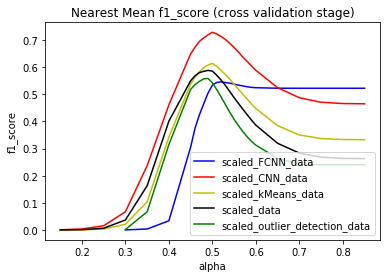

In [16]:
plt.title("Nearest Mean f1_score (cross validation stage)")
plt.plot(NN_scaled_FCNN_result[4:]['alpha'],NN_scaled_FCNN_result[4:]['f1_score'],"b-",label='scaled_FCNN_data')
plt.plot(NN_scaled_CNN_result[1:]['alpha'],NN_scaled_CNN_result[1:]['f1_score'],"r-",label='scaled_CNN_data')
plt.plot(NN_scaled_kMeans_result[1:]['alpha'],NN_scaled_kMeans_result[1:]['f1_score'],"y-",label='scaled_kMeans_data')
plt.plot(NN_scaled_result[1:]['alpha'],NN_scaled_result[1:]['f1_score'],"k-",label='scaled_data')
plt.plot(NN_scaled_outlier_detection_result[4:]['alpha'],NN_scaled_outlier_detection_result[4:]['f1_score'],"g-",label='scaled_outlier_detection_data')
plt.xlabel('alpha')
plt.ylabel('f1_score')
plt.legend()
plt.show()

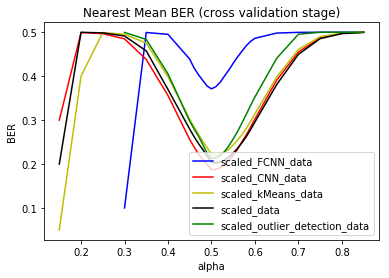

In [17]:
plt.title("Nearest Mean BER (cross validation stage)")
plt.plot(NN_scaled_FCNN_result[4:]['alpha'],NN_scaled_FCNN_result[4:]['BER'],"b-",label='scaled_FCNN_data')
plt.plot(NN_scaled_CNN_result[1:]['alpha'],NN_scaled_CNN_result[1:]['BER'],"r-",label='scaled_CNN_data')
plt.plot(NN_scaled_kMeans_result[1:]['alpha'],NN_scaled_kMeans_result[1:]['BER'],"y-",label='scaled_kMeans_data')
plt.plot(NN_scaled_result[1:]['alpha'],NN_scaled_result[1:]['BER'],"k-",label='scaled_data')
plt.plot(NN_scaled_outlier_detection_result[4:]['alpha'],NN_scaled_outlier_detection_result[4:]['BER'],"g-",label='scaled_outlier_detection_data')
plt.xlabel('alpha')
plt.ylabel('BER')
plt.legend()
plt.show()

### have a general idea where the best result locates ###

In [18]:
NN_scaled_CNN_result.loc[NN_scaled_CNN_result['f1_score'].idxmax()]

alpha       0.500000
f1_score    0.728679
TPR         0.794740
FPR         0.167867
BER         0.186563
Name: 13, dtype: float64

In [19]:
NN_scaled_FCNN_result.loc[NN_scaled_FCNN_result['f1_score'].idxmax()]

alpha       0.520000
f1_score    0.545216
TPR         0.697785
FPR         0.470902
BER         0.386559
Name: 15, dtype: float64

In [20]:
NN_scaled_kMeans_result.loc[NN_scaled_kMeans_result['f1_score'].idxmax()]

alpha       0.500000
f1_score    0.613814
TPR         0.700317
FPR         0.144820
BER         0.222252
Name: 13, dtype: float64

In [21]:
NN_scaled_result.loc[NN_scaled_result['f1_score'].idxmax()]

alpha       0.490000
f1_score    0.587786
TPR         0.673524
FPR         0.110040
BER         0.218258
Name: 12, dtype: float64

In [20]:
NN_scaled_outlier_detection_result.loc[NN_scaled_outlier_detection_result['f1_score'].idxmax()]

alpha       0.490000
f1_score    0.558194
TPR         0.664244
FPR         0.113223
BER         0.224490
Name: 12, dtype: float64

# Try to get the best result, and then try it on validation dataset. #

#### outlier datection data set ####

In [13]:
NN_scaled_outlier_detection_result_presion=nn_predict_with_distance_adjust_presion(X_scaled_outlier_detection,y_scaled_outlier_detection,0.48,0.50)
NN_scaled_outlier_detection_result_presion.loc[NN_scaled_outlier_detection_result_presion['f1_score'].idxmax()]

alpha       0.492000
f1_score    0.553277
TPR         0.699198
FPR         0.131041
BER         0.215921
Name: 12, dtype: float64

In [14]:
nn_validation (X_scaled_outlier_detection,y_scaled_outlier_detection,X_val,y_val,0.492)

TPR:0.6746031746031746   f1 score:0.4622077215878195   FPR:0.1793258940970804   BER:0.2523613597469529


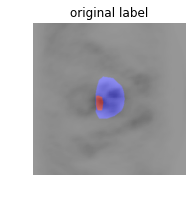

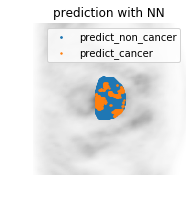

In [6]:
stuck,slices,features=11,22,3
nn_plot_prediction(stuck,slices,features,X_scaled_outlier_detection,y_scaled_outlier_detection,X_val,y_val,0.492)

#### CNN data set ####

In [6]:
NN_scaled_CNN_result_presion=nn_predict_with_distance_adjust_presion(X_scaled_CNN,y_scaled_CNN,0.49,0.52)
NN_scaled_CNN_result_presion.loc[NN_scaled_CNN_result_presion['f1_score'].idxmax()]

alpha       0.498000
f1_score    0.729955
TPR         0.787554
FPR         0.160780
BER         0.186613
Name: 8, dtype: float64

In [8]:
nn_validation (X_scaled_CNN,y_scaled_CNN,X_val,y_val,0.498)

TPR:0.5568027210884354   f1 score:0.516430937483569   FPR:0.0863953469374418   BER:0.26479631292450323


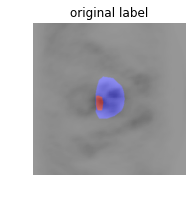

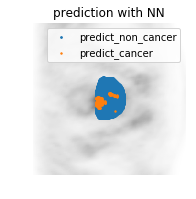

In [12]:
stuck,slices,features=11,22,3
nn_plot_prediction(stuck,slices,features,X_scaled_CNN,y_scaled_CNN,X_val,y_val,0.498)

#### FCNN data set #### 

In [8]:
NN_scaled_FCNN_result_presion=nn_predict_with_distance_adjust_presion(X_scaled_FCNN,y_scaled_FCNN,0.51,0.53)
NN_scaled_FCNN_result_presion.loc[NN_scaled_FCNN_result_presion['f1_score'].idxmax()]

alpha       0.521000
f1_score    0.545850
TPR         0.704264
FPR         0.478710
BER         0.387223
Name: 11, dtype: float64

In [9]:
nn_validation (X_scaled_FCNN,y_scaled_FCNN,X_val,y_val,0.521000)

TPR:0.8069160997732426   f1 score:0.4804401390623418   FPR:0.22366722760468574   BER:0.20837556391572154


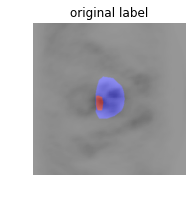

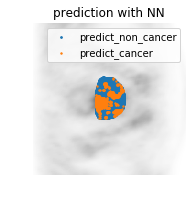

In [13]:
stuck,slices,features=11,22,3
nn_plot_prediction(stuck,slices,features,X_scaled_FCNN,y_scaled_FCNN,X_val,y_val,0.521000)

#### scaled data set ####

In [10]:
NN_scaled_result_presion=nn_predict_with_distance_adjust_presion(X_scaled,y_scaled,0.48,0.51)
NN_scaled_result_presion.loc[NN_scaled_result_presion['f1_score'].idxmax()]

alpha       0.494000
f1_score    0.590564
TPR         0.698380
FPR         0.118686
BER         0.210153
Name: 14, dtype: float64

In [10]:
nn_validation (X_scaled,y_scaled,X_val,y_val, 0.494000)

TPR:0.6764172335600908   f1 score:0.5201168214114467   FPR:0.1332363945300374   BER:0.22840958048497334


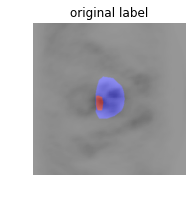

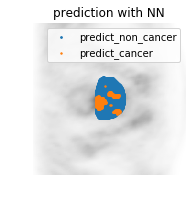

In [7]:
stuck,slices,features=11,22,3
nn_plot_prediction(stuck,slices,features,X_scaled,y_scaled,X_val,y_val,0.494000)

#### kMeans data set ####

In [12]:
NN_scaled_kMeans_result_presion=nn_predict_with_distance_adjust_presion(X_scaled_kMeans,y_scaled_kMeans,0.49,0.51)
NN_scaled_kMeans_result_presion.loc[NN_scaled_kMeans_result_presion['f1_score'].idxmax()]

alpha       0.496000
f1_score    0.615950
TPR         0.681884
FPR         0.132543
BER         0.225329
Name: 6, dtype: float64

In [11]:
nn_validation (X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,0.496000)

TPR:0.6615646258503401   f1 score:0.5285804873629857   FPR:0.12127697812341726   BER:0.22985617613653855


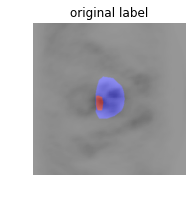

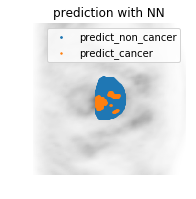

In [14]:
stuck,slices,features=11,22,3
nn_plot_prediction(stuck,slices,features,X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,0.496000)